# 2021.06.25 크롤링 공부

https://www.fun-coding.org/crawl_advance3.html

## Selenium과 Phantom JS 활용


+ Selenium : 웹을 테스트하기 위한 프레임워크



In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [29]:
# 드라이버 생성

# 드라이버 주소를 먼저 명시하여 범용성 확보
chromedriver = '/usr/local/bin/chromedriver'
driver = webdriver.Chrome(chromedriver)

# 사이트 호출
driver.get('http://www.python.org')

assert "Python" in driver.title

### Assertion Error

+ Selenium은 웹 테스트를 위한 프레임워크이기에 위의 assert A in B 구문으로 테스트를 자동으로 진행한다.


+ 만약 assert을 통과하지 못하면 아래와 같은 assertion error을 반환하게 된다.

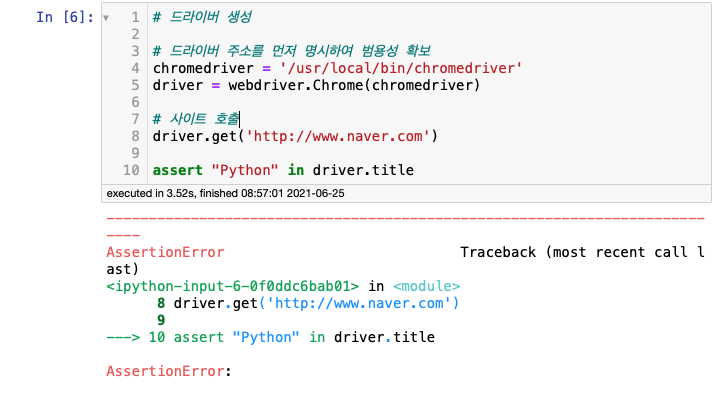

### 검색, 이벤트 전송

In [26]:
# 태그 이름으로 특정한 태그를 찾을 수 있음
#입력창을 찾는 것
elem = driver.find_element_by_name('q')


#input 텍스트 초기화
#먼저 선입력된 것이 있을 수 있으므로 초기화
elem.clear()


#키 이벤트 전송
#입력창에 문자열 입력
#send_keys(*value) : 선택한 요소에 키보드 입력을 명령함.
elem.send_keys('pycon')

#태그가 input 태그여서 엔터만 입력하면 form action으로 보내짐
#엔터는 특수 키 이므로 Keys.RETURN으로 하면 된다. or Keys.ENTER
elem.send_keys(Keys.RETURN)

#Test
# 페이지 소스에 No results found가 들어있지 않으면 잘 검색된 것
assert "No results found." not in driver.page_source

#기다리기(대기) 2초
time.sleep(2)

driver.quit()

<selenium.webdriver.remote.webelement.WebElement (session="bcec6bac6934de87f6cff8069cbb385d", element="e93c519d-fa1d-44c4-a889-1e38eac37633")>


### 스크린 샷 찍기

In [37]:
driver = webdriver.Chrome(chromedriver)

driver.get('http://www.python.org')

print(driver.current_url)
print(driver.title)

elem = driver.find_element_by_name('q')

elem.clear()

elem.send_keys('Python')

elem.send_keys(Keys.RETURN)

#screen shot
#스크린 샷을 찍기 위해 풀 스크린
driver.set_window_size(1400,1000)

#찍엇
driver.save_screenshot('python_event.png') #경로 지정을 원하면 해주면 됨
time.sleep(5)
assert "No results found." not in driver.page_source

driver.quit()

https://www.python.org/
Welcome to Python.org
<selenium.webdriver.remote.webelement.WebElement (session="8f0834116c007accce8c4601d23f494b", element="f9384d3a-f804-47da-b1b7-fe06352500dc")>


### Elements 가져오기

In [39]:
driver = webdriver.Chrome(chromedriver)

driver.get("http://v.media.daum.net/v/20170202185812986")

# 최초 발견한 태그만 검색
title = driver.find_element_by_tag_name("h3")
print(title.text)
print(type(title))

# 모든 태그 검색 -> list로 반환
h3s = driver.find_elements_by_tag_name("h3")
print(type(h3s))

for h3 in h3s:
    print(h3.text)

# id로 검색
body = driver.find_element_by_id("harmonyContainer")
driver.quit()

'포켓몬고' 상륙 1주일.. 대한민국 곳곳이 들썩
<class 'selenium.webdriver.remote.webelement.WebElement'>
<class 'list'>
'포켓몬고' 상륙 1주일.. 대한민국 곳곳이 들썩
파이낸셜뉴스 주요 뉴스
많이본 뉴스
포토&TV
이 시각 추천뉴스


### Css selector 사용

In [42]:
driver = webdriver.Chrome(chromedriver)

driver.get("http://v.media.daum.net/v/20170202185812986")

#class 가 tit_view인 h3태그
title = driver.find_element_by_css_selector('h3.tit_view')

print(title.text)

title_data = driver.find_element_by_css_selector('html head title')
print(title_data)
print('---------------')
print(title_data.get_attribute('text'))

contents = driver.find_element_by_css_selector('div#harmonyContainer')

print(contents.text)

for p in contents.find_elements_by_tag_name('p'):
    print(p.text)

driver.quit()

'포켓몬고' 상륙 1주일.. 대한민국 곳곳이 들썩
<selenium.webdriver.remote.webelement.WebElement (session="58f37c8602522f78be54327ed11d81bc", element="ef28605a-7975-43e4-9a38-45ea39810f1a")>
---------------
'포켓몬고' 상륙 1주일.. 대한민국 곳곳이 들썩
이용자수 700만명 육박 국민 10명중 1명이 경험
전국 번화가.공원 '북적' 지역 상권도 후광효과
출몰 잦은'포세권' 편의점 핫팩.간식 등 매출 급증
지난달 24일 출시된 모바일게임 '포켓몬고'가 출시 1주일여만에 우리나라 거리 풍경을 크게 바꿔놨다. 번화가나 공원 등 거리 곳곳에서 손에 스마트폰을 들고 '포켓몬'을 사냥하는 모습을 손쉽게 찾아볼 수 있게 된 것이다.다른 국가에 비해 반년 가량 늦게 출시됐음에도 불구, 이용자 수가 700만명에 육박한 것으로 알려졌다. 우리나라 국민 10명 중 1명은 지난 1주일 사이에 한번은 포켓몬고 게임을 해봤다는 얘기다.

지역경제 활성화에도 도움이 되고 있다. 포켓몬이 자주 출몰하는 지역으로 입소문을 탄 지역 편의점 매출이 급증하는 현상도 나타났다. 지난해 여름, 강원도 속초가 '포켓몬고' 특수를 톡톡히 누린 것과 비슷한 현상이 전국 곳곳에서 나타나고 있는 것이다.

■우리 국민 10명 중 1명은 '포켓몬고' 게이머

애플리케이션(앱) 분석업체 와이즈앱은 2일 전국 2만3000명의 안드로이드 스마트폰 사용자 표본조사를 바탕으로 추정한 지난 1주일간 '포켓몬고' 이용자는 698만명이라고 발표했다. 특히 10대와 20대 이용자들이 '포켓몬고'에 열광하고 있는 것으로 나타났다. 전체 이용자의 65% 이상이 10대와 20대다.

이 게임 개발사인 나이언틱랩스가 설 연휴 직전에 출시한 전략도 제대로 맞아 떨어졌다. 지난 설 연휴, 고향에서 가족과 친지들이 모여 '포켓몬고'를 즐기는 모습이 곳곳에서 눈에 띄였다. 고속도로 휴게소 등에서도 포켓몬고 이용자

In [44]:
driver = webdriver.Chrome(chromedriver)

driver.get('http://v.media.daum.net/v/20170202185812986')

#role attribute가 navigation인 div 태그
nav = driver.find_element_by_css_selector('div[role="navigation"]')
print(nav.text)
driver.quit()

홈
사회
정치
경제
국제
문화
IT
랭킹
연재
포토
TV
갤러리
서울
서울 26 ℃


## Xpath 를 이용한 크롤링

<Xpath 문법>

+ / : 절대 경로
+ //: 문서 내에서 검색
+ //@href: href 속성이 있는 모든 태그 선택
+ //a[@href='http://google.com'] : a태그의 href속성에 http://google.com 속성값을 가진 모든 태그 선택
+ (//a)[3] : 문서의 세 번째 링크 선택
+ (//table)[last()] 문서의 마지막 테이블 선택
+ (//a)[position()<3]:문서의 처음 두 링크 선택

In [50]:
driver = webdriver.Chrome(chromedriver)

driver.get('http://v.media.daum.net/v/20170202185812986')

#문서 내의 어떤 태그든지 가능
title = driver.find_element_by_xpath('//title')

#절대경로로 찾기
title_data = driver.find_element_by_xpath('/html/head/title')


#태그 내에서 다시 검색
title_data2 = driver.find_element_by_xpath('/html//title')

print(title.get_attribute('text'))
print(title_data.get_attribute('text'))
print(title_data2.get_attribute('text'))

driver.quit()


'포켓몬고' 상륙 1주일.. 대한민국 곳곳이 들썩
'포켓몬고' 상륙 1주일.. 대한민국 곳곳이 들썩
'포켓몬고' 상륙 1주일.. 대한민국 곳곳이 들썩


In [56]:
#예제
driver = webdriver.Chrome(chromedriver)

driver.get('http://v.media.daum.net/v/20170202180355822')

data = driver.find_element_by_xpath('//*[@id="mArticle"]/div[1]/div[2]/strong')

print(data.text)

[김익현의 미디어 읽기] '마이너리티 리포트'와 AI


## 페이지 로딩시간을 기다린 후 크롤링

+ WebDriverWait() 메서드 사용

In [57]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome(chromedriver)

driver.get("http://v.media.daum.net/v/20170202180355822")

try:
    # id가 cMain인 tag를 10초 내에 검색, 그렇지 않으면 timeout
    # By.ID 는 ID로 검색, By.CSS_SELECTOR는 CSS Selector로 검색

    element = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "cMain"))
    )
    print(element.text)

except TimeoutException:
    print("해당 페이지에 cMain을 ID로 가진 태그가 존재하지 않거나, 해당 페이지가 10초 안에 열리지 않았습니다.")

# error가 발생해도 finally 절은 실행된다.
finally:
    driver.quit()

[김익현의 미디어 읽기] '마이너리티 리포트'와 AI
(지디넷코리아=김익현 기자)한 때 ‘마이너리티 리포트’란 영화가 인기를 끈 적 있다. 최첨단 치안시스템을 통해 범죄를 미리 예측한 뒤 특수 경찰을 보내 미래의 범죄자들을 체포하는 얘기다.
하지만 그 영화를 보면서 “그럴듯하다”고 생각했던 사람은 거의 없었다. ‘무서운 미래’이긴 했지만 ‘있음직한 미래상’은 아니었단 얘기다.
최근 인공지능(AI)이 포커 시합에서 최고수 프로 선수를 꺾었단 소식을 접하면서 ‘마이너리티 리포트’가 황당한 얘기만은 아닐 수도 있다는 생각을 하게 됐다.
일단 팩트부터 챙겨보자.
프로 포커 선수 네 명을 꺾은 화제의 주인공은 리브라투스(Libratus)란 AI 프로그램이다. 미국 카네기멜론대학 연구팀이 개발한 이 프로그램은 지난 달 11일부터 30일까지 20일 동안 계속된 포커 대결에서 승리했다.
자세한 얘기는 생략한다. 궁금한 분은 지디넷코리아에 게재된 기사를 확인해보시라.
■ 바둑과는 또 다른 포커 정복
이번 결과에 대해 카네기멜론대학 뿐 아니라 세계 주요 외신들도 흥분을 감추지 못하고 있다.
당연히 궁금증이 제기되지 않을 수 없다. 이미 AI는 퀴즈쇼, 체스에 이어 난공불락의 영역이라 일컬어지던 바둑까지 정복했기 때문이다.
세계 최강 이세돌 9단에 이어 중국의 커제 9단까지 알파고에 완패한 마당에 포커 시합에서 진 게 뭐 그리 대단한 일이냐고 생각할 수도 있다.
하지만 포커와 바둑은 조금 다르다.
물론 바둑 경기에서 고려해야 할 수는 무한 대에 가깝다. 한 수를 둘 때 가능한 수가 250개 정도에 이른다.한 경기에 150수 이상 둔다고 가정하면 '250의 150승’이란 경우의 수가 만들어진다. 이게 유기적으로 연결돼야 한다. 중간에 수 하나만 삐끗해도 시합을 망치게 된다.
인공지능 프로그램 리브라투스와 프로 포커 선수들의 시합 장면. (사진=카네기멜론대학)
그 동안 ‘바둑은 인간의 영역’이라고 했던 건 인공지능은 직관적으로 문제를 해결하긴 쉽지 않을 것으로 생각했기 때문이다.
이

## 웹 사이트 자동 조작하기

<Element를 클릭하는 등의 Event를 전송>

+ element 클릭: element.click()
+ element 더블 클릭: element.double_click()
+ element 키보드 입력 전송: element.send_keys()
+ element 로 마우스 이동: element.move_to_element()

In [58]:
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver import ActionChains

driver = webdriver.Chrome(chromedriver)

driver.get('http://pythonscraping.com/pages/files/form.html')

#입력할 곳을 찾고
firstnameField = driver.find_element_by_name('firstname')
lastnameField = driver.find_element_by_name('lastname')
#누를 버튼을 찾고
submitButton = driver.find_element_by_id('submit')

#입력할 내용을 찾아넣는다!
firstnameField.send_keys('Doky')
lastnameField.send_keys('Kim')
submitButton.click()

print(driver.find_element_by_tag_name('body').text)

driver.close()

Hello there, Doky Kim!


### Xpath 예제

+ 코드를 추가하여 해당 다음 뉴스 댓글을 모두 출력하는 프로그램 작성하기

In [6]:
from selenium.webdriver.remote.webelement import WebElement
from selenium.webdriver import ActionChains
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [7]:
chromedriver = '/usr/local/bin/chromedriver'

<논리 전개 방식>

+ 댓글 영역이 뜰 때 까지 기다리고, 

+ 더보기 버튼을 계속 눌러서 확장 -> 끝까지 확장되면 한번에 추출



In [12]:

driver = webdriver.Chrome(chromedriver)

driver.get('http://v.media.daum.net/v/20170922175202762')

try:
    element = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.ID, "alex-area"))
    )
    
finally:
    loop = True
    while loop:
        try:
            #더보기를 찾는다.
            element = WebDriverWait(driver, 3).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, '#alex-area > div > div > div > div.cmt_box > div.alex_more > button'))
            )

            #더보기 버튼을 정의하고
            more_button = driver.find_element_by_xpath('//*[@id="alex-area"]/div/div/div/div[3]/div[3]/button')
            #더보기 버튼을 누른다
            webdriver.ActionChains(driver).move_to_element(more_button).click(more_button).perform()
        except:
            #더 이상 더 보기가 없으면
            loop = False
            
            #댓글들을 담고있는 덩어리를 찾고
            content = driver.find_element_by_css_selector('#alex-area > div > div > div > div.cmt_box > ul.list_comment')
            
            #덩어리 안에 p 태그 안에 text가 포함되어있기 때문에 그들을 출력
            for p in content.find_elements_by_tag_name('p'):
                print(p.text)

그래도 삼성보다 많이 팔림
그리고 아이폰x가아니잖아 기레기야
아이폰8이면 아이폰7업그레이드버전아니냐?
아이폰X 기다리자나
당연하지 호구인증폰인데.
기자님아 요즘은 인터넷으로 예약해서 줄 안서도 되거든요.
언제나 언론은 삼성편들면서
아이폰을 깎아내리지만
얼마후 외신발 기사는
항상 아이폰이 대박친다는 사실을 알려준다
8년째 기우제 지내는 기레기들

나중에 진짜로 아이폰 인기 시들해지면 아주 광분하면서

"거봐 내말이 맞잖아~" 할듯

에고 아무 의미 없다.
아이폰은 아니지만 아이폰이 있었기에 인터넷도하고 좋은 스마트폰 잘 쓰고있음.
그래 이제 엘지도 써보자고요 삼성 이제 그만 쓰기로 했음
오늘도 애플은 한국에서 망한회사입니다ㅋㅋㅋㅋㅋㅋ 팔려도 안팔려도 전세계 스마트폰 영업이익률의 70%기 애플꺼...이런 쓰잘데기 없는 기레기들은 월급 왜 주냐??
요즘 같은 시대에 핸폰 때문에 줄서있는것도 웃기지 ㅋ ㅋ ㅋ ㄱ
삼성은 단 한번도 열기가 없었지.
기자들은 왜 8년째 애플 망해간다고 염불을 하는지 모르겠다.
호주에서 아이폰8 첫 구매자는 올해 20세인 대학생 메이전 코로우치 씨였다. 그는 열흘 동안 애플 스토어 앞에서 기다린 끝에 영광을 차지했다고 씨넷이 전했다.....

여기나 저기나 할 일 없는 애들 많네요.
장난치나  저렇게  사는이유를 모르겠네 한정판도  아니구  왜들 날린지
저렇게까지 할필요가 있을까
노트8은 열광적이냐? ㅋㅋㅋ
이상하게 회교도 사람들이 애플을 많이 쓰데.....
이렇게 기사쓰고 입금받는건 김영란 법에 저촉되는지
확인하고싶다.
삼상꺼는 안산다

국민연금 건드린 새끼들꺼

사는놈들이 더 나빠
